<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0731/13_Albumentation_for_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Albumentation for augmentation

### Tutorial
https://albumentations.ai/docs/getting_started/mask_augmentation/

1) Object Detection
Albumentations supports four formats: pascal_voc, albumentations, coco, and yolo
- 각 format은 각자의 bouning boxes coordinates 형식이 있다.
    - pascal_voc(절대값) : [x_min, y_min, x_max, y_max]
    - albumentations(상대값) : [x_min, y_min, x_max, y_max]
    - coco(절대값) : [x_min, y_min, width, height]
    - yolo(상대값) : [x_center, y_center, width, height]

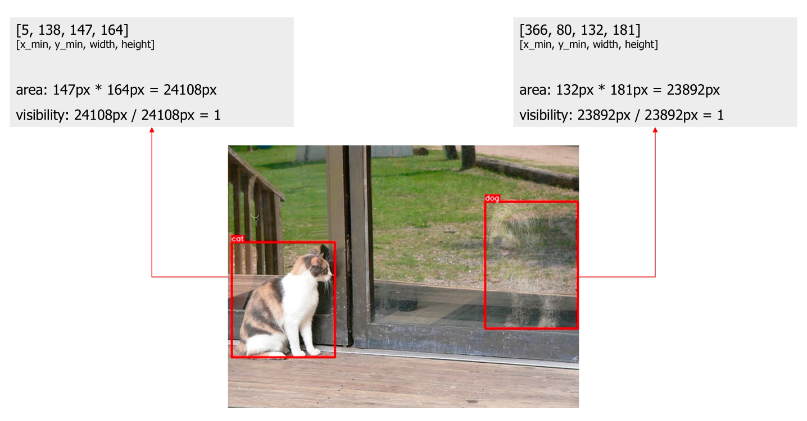

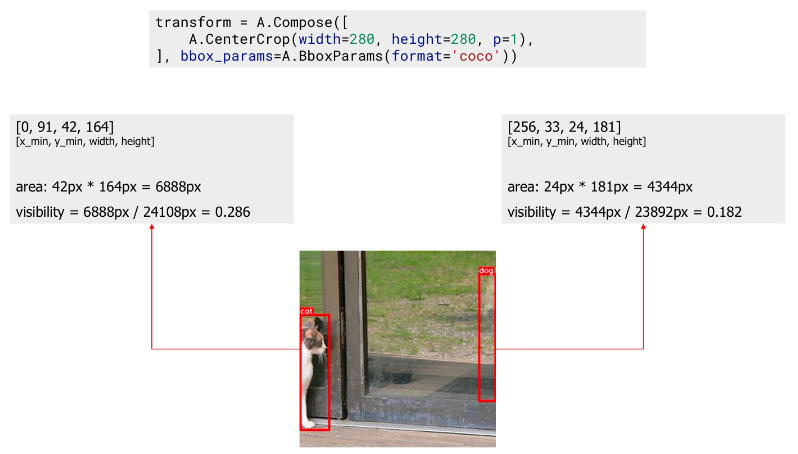

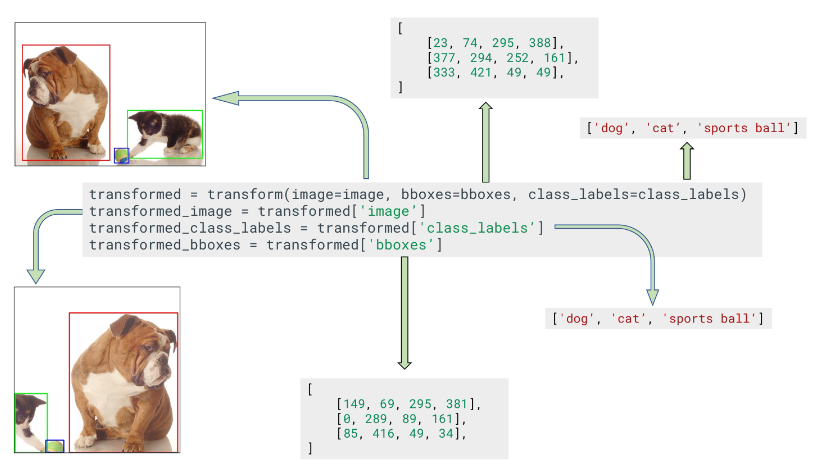

2) Segmentation
- mask image

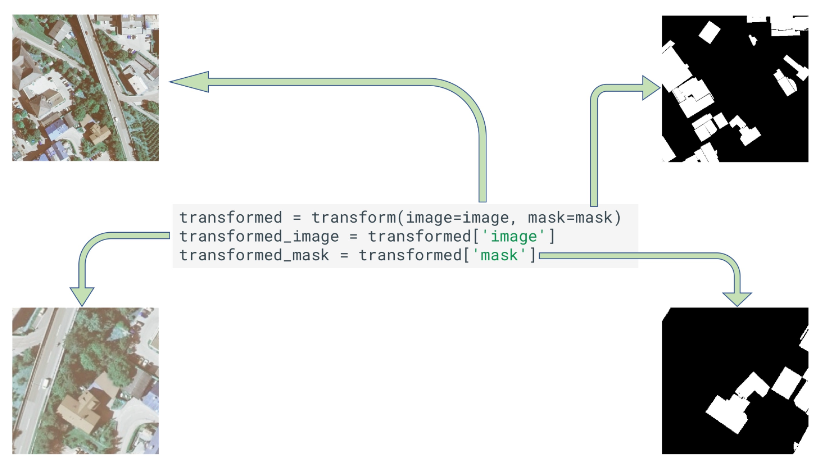

In [ ]:
import albumentations as A

In [ ]:
dir(A) # 디렉토리 확인: 다양한 augmentation 지원, 모두 다 쓰는 건 성능 저하의 요인, 필요한 것만 사용할 것

['AdvancedBlur',
 'Affine',
 'BaseCompose',
 'BasicIAATransform',
 'BasicTransform',
 'BboxParams',
 'Blur',
 'CLAHE',
 'CenterCrop',
 'ChannelDropout',
 'ChannelShuffle',
 'CoarseDropout',
 'ColorJitter',
 'Compose',
 'Crop',
 'CropAndPad',
 'CropNonEmptyMaskIfExists',
 'Cutout',
 'Downscale',
 'DualIAATransform',
 'DualTransform',
 'ElasticTransform',
 'Emboss',
 'Equalize',
 'FDA',
 'FancyPCA',
 'Flip',
 'FromFloat',
 'GaussNoise',
 'GaussianBlur',
 'GlassBlur',
 'GridDistortion',
 'GridDropout',
 'HistogramMatching',
 'HorizontalFlip',
 'HueSaturationValue',
 'IAAAdditiveGaussianNoise',
 'IAAAffine',
 'IAACropAndPad',
 'IAAEmboss',
 'IAAFliplr',
 'IAAFlipud',
 'IAAPerspective',
 'IAAPiecewiseAffine',
 'IAASharpen',
 'IAASuperpixels',
 'ISONoise',
 'ImageCompression',
 'ImageOnlyIAATransform',
 'ImageOnlyTransform',
 'InvertImg',
 'JpegCompression',
 'KeypointParams',
 'Lambda',
 'LongestMaxSize',
 'MAX_VALUES_BY_DTYPE',
 'MaskDropout',
 'MedianBlur',
 'MotionBlur',
 'Multiplicative

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import random
# from IPython.display import Image, display

import cv2
from PIL import ImageOps

import tensorflow as tf
from tensorflow import keras
from keras.utils import load_img, img_to_array
# from tensorflow.keras import layers
# from tensorflow.keras.layers import Input, Conv2D, Dropout, Activation, UpSampling2D, GlobalMaxPooling2D, multiply
# from tensorflow.keras.backend import max
# from tensorflow.python.client import device_lib

In [ ]:
# image data
!gdown 1dol8eJfAFPqSYKXND8_eXMevohpyEyMP

Downloading...
From: https://drive.google.com/uc?id=1dol8eJfAFPqSYKXND8_eXMevohpyEyMP
To: /content/images.tar.gz
100% 792M/792M [00:15<00:00, 52.6MB/s]


In [ ]:
# annotation data
!gdown 1Kst2nBmsoUVdSRMeuesakLFRqGCGjPJx

Downloading...
From: https://drive.google.com/uc?id=1Kst2nBmsoUVdSRMeuesakLFRqGCGjPJx
To: /content/annotations.tar.gz
100% 19.2M/19.2M [00:00<00:00, 45.4MB/s]


In [ ]:
!tar -xf images.tar.gz

In [ ]:
!tar -xf annotations.tar.gz

In [ ]:
## 이미지 데이터 path 지정
input_dir = "images/"
target_dir = "annotations/trimaps/"
img_size = (128, 128)
num_classes = 3
batch_size = 32

input_img_paths = sorted([os.path.join(input_dir, fname) for fname in os.listdir(input_dir)
                                                            if fname[-3:] == "jpg"])
target_img_paths = sorted([os.path.join(target_dir, fname) for fname in os.listdir(target_dir)
                                                            if fname[-3:] == "png" and fname[0] !="."])

print("Number of samples:", len(input_img_paths))

for input_path, target_path in zip(input_img_paths[:3], target_img_paths[:3]):
    print(input_path, "|", target_path)

Number of samples: 7390
images/Abyssinian_1.jpg | annotations/trimaps/Abyssinian_1.png
images/Abyssinian_10.jpg | annotations/trimaps/Abyssinian_10.png
images/Abyssinian_100.jpg | annotations/trimaps/Abyssinian_100.png


In [ ]:
## 학습 데이터 확인
for img_idx in range(3):
    ori_img = image.load_img(input_img_paths[img_idx])
    target_img = ImageOps.autocontrast(image.load_img(target_img_paths[img_idx]))

    plt.subplot(1,2,1)
    plt.axis("off")
    plt.imshow(ori_img)

    plt.subplot(1,2,2)
    plt.axis("off")
    plt.imshow(target_img, vmax = 3, vmin = 0)
    plt.show()

In [ ]:
# transform : augment 수행(기획)
transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2)
]) # object detection : , bbox_params=A.BboxParams(format='yolo')

In [ ]:
img = cv2.imread("/content/images/Abyssinian_1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
mask = cv2.imread("/content/annotations/trimaps/Abyssinian_1.png")

In [ ]:
transformed = transform(image=img, mask=mask)
transformed # dict 형태로 저장

{'image': array([[[ 80,  89,  72],
         [ 80,  89,  72],
         [ 80,  89,  70],
         ...,
         [125, 134, 113],
         [123, 132, 111],
         [120, 129, 108]],
 
        [[ 80,  89,  72],
         [ 80,  89,  72],
         [ 80,  89,  70],
         ...,
         [125, 134, 113],
         [123, 132, 111],
         [120, 129, 108]],
 
        [[ 81,  90,  73],
         [ 80,  89,  72],
         [ 80,  89,  70],
         ...,
         [127, 136, 115],
         [124, 133, 112],
         [121, 130, 109]],
 
        ...,
 
        [[ 35,  38,  27],
         [ 34,  37,  26],
         [ 36,  39,  28],
         ...,
         [ 40,  44,  30],
         [ 40,  44,  30],
         [ 39,  43,  29]],
 
        [[ 35,  38,  27],
         [ 35,  38,  27],
         [ 36,  39,  28],
         ...,
         [ 40,  44,  30],
         [ 40,  44,  30],
         [ 39,  43,  29]],
 
        [[ 35,  38,  27],
         [ 35,  38,  27],
         [ 36,  39,  28],
         ...,
         [ 40,  44,

In [ ]:
transformed_image = transformed['image']
transformed_mask = transformed['mask']

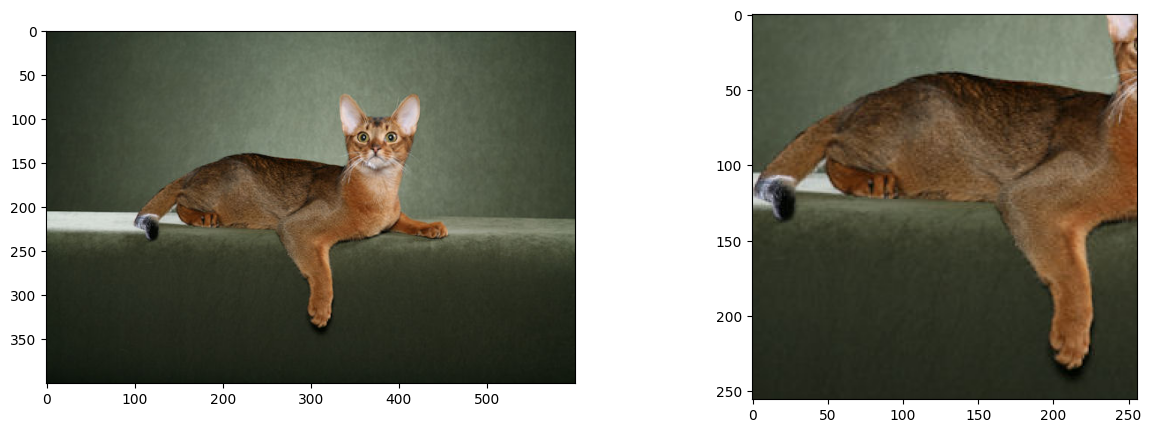

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(transformed_image)

### Set DataLoader with agmentation

In [ ]:
class Augmentation:
    def __init__(self, size, mode='train'):
        if mode == 'train':
            # Declare an augmentation pipeline
            self.transform = A.Compose([
                            A.RandomCrop(width=256, height=256),
                            A.HorizontalFlip(p=0.5),
                            A.RandomBrightnessContrast(p=0.2),
                             A.CoarseDropout(p=0.5)
                        ])

    def __call__(self, **kwargs): # **kwargs : 가변인자, **을 쓰면 dict 형태로 들어온다
        if self.transform:
            augmented = self.transform(**kwargs)
            img = augmented['image']
            mask = augmented['mask']
            return img, mask

In [ ]:
class OxfordPetDataset(keras.utils.Sequence):
    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

        self.transform = Augmentation(image_size, mode)

    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size

        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]

        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32")
        for j, path in enumerate(batch_input_img_paths):
            img = image.load_img(path, target_size=self.img_size)
            x[j] = img

        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
        for j, path in enumerate(batch_target_img_paths):
            img = image.load_img(path, target_size=self.img_size, color_mode="grayscale")
            y[j] = np.expand_dims(img, 2)

            # target data에 있는 라벨인 1, 2, 3 에서 1을 빼서 0, 1, 2 로 변경
            y[j] -= 1
        return x, y

    def get_data(self, data):
        batch_x = []
        batch_y = []

        for _, row in data.iterrows():
            file_name = row['file_name']

            img = cv2.imread(f'images/{file_name}.jpg')
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (self.image_size, self.image_size))

            mask = cv2.imread(f'annotations/trimaps/{file_name}.png', cv2.IMREAD_GRAYSCALE)
            mask = cv2.resize(mask, (self.image_size, self.image_size))
            mask[mask != 1] = 0

            if self.mode == 'train':
                img, mask = self.transform(image=img, mask=mask)

            img = img.astype('float32') / 255.
            mask = mask.astype('float32')

            batch_x.append(img)
            batch_y.append(mask)
        return batch_x, batch_y